# Import Dependencies

In [1]:
### Data Processing Dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

### Machine Learning Algorithm Dependencies
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Evaluating Machine Learning Dependencies
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

### Visualization Dependencies
import pydotplus
import PIL
from PIL import Image
from IPython.display import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Preprocessing

In [2]:
### Read in the data
df = pd.read_csv("../Resources/df_finalized.csv")
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,income_category,loan_category,Interest_Rate_Category(%),age_group,employment_duration_bucket,cred_hist_bucket
0,2.0,21,9600,OWN,5.0,EDUCATION,A,1000,11.14,1,NEW,2,NO DEFAULT,"$0 - $20,000","$0 - $5,000",9.01 - 13,18 - 24,6 - 10,0 - 5
1,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,5500,12.87,5,N,3,DEFAULT,"$0 - $20,000","$5,001 - $10,000",9.01 - 13,25 - 34,0 - 5,0 - 5
2,6.0,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,N,2,DEFAULT,"$0 - $20,000","$0 - $5,000",5 - 9,18 - 24,0 - 5,0 - 5
3,10.0,21,10000,OWN,6.0,VENTURE,C,1600,14.74,1,N,3,DEFAULT,"$0 - $20,000","$0 - $5,000",13.01 - 17,18 - 24,6 - 10,0 - 5
4,12.0,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,N,2,DEFAULT,"$0 - $20,000","$0 - $5,000",5 - 9,18 - 24,0 - 5,0 - 5


In [3]:
### Look at the data types
df.dtypes

customer_id                   float64
customer_age                    int64
customer_income                 int64
home_ownership                 object
employment_duration           float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
term_years                      int64
historical_default             object
cred_hist_length                int64
Current_loan_status            object
income_category                object
loan_category                  object
Interest_Rate_Category(%)      object
age_group                      object
employment_duration_bucket     object
cred_hist_bucket               object
dtype: object

In [4]:
### Create dummy variables from categorical variables
df_w_dummies = pd.get_dummies(df[['income_category', 'loan_category', 'Interest_Rate_Category(%)', 'age_group', 'employment_duration_bucket', 
                  'cred_hist_bucket', 'home_ownership', 'loan_intent', 'loan_grade', 'historical_default']], dtype=int)


In [5]:
### Make new dataframe with dummy variables
df_w_dummies["term_years"] = df["term_years"]
df_w_dummies["Current_loan_status"] = df["Current_loan_status"]
df_w_dummies.head()

,"income_category_$0 - $20,000","income_category_$20,001 - $40,000","income_category_$40,001 - $60,000","income_category_$60,001 - $80,000","income_category_$80,001+","loan_category_$0 - $5,000","loan_category_$10,001 - $15,000","loan_category_$15,001 - $20,000","loan_category_$20,001+","loan_category_$5,001 - $10,000",...,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,historical_default_N,historical_default_NEW,historical_default_Y,term_years,Current_loan_status
0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,NO DEFAULT
1,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,5,DEFAULT
2,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,DEFAULT
3,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,DEFAULT
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,DEFAULT


In [6]:
### Change 'Current_loan_status' column to boolean because with the values as strings, there was difficulty counting how many
### were predicted as DEFAULT vs NO DEFAULT
### Mapping code from google search AI
mapping = {'DEFAULT': True, 'NO DEFAULT': False}
df_w_dummies['Current_loan_status'] = df['Current_loan_status'].map(mapping) 

In [7]:
### Check to see that converting 'Current_loan_status' to boolean worked
df_w_dummies['Current_loan_status']

0        False
1         True
2         True
3         True
4         True
         ...  
26085     True
26086    False
26087    False
26088    False
26089    False
Name: Current_loan_status, Length: 26090, dtype: bool

In [8]:
### Save predictors to variable 'X' and target variable to a variable 'y'
X = df_w_dummies.drop(["Current_loan_status"], axis=1)
y = df_w_dummies["Current_loan_status"]

In [9]:
### Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [10]:
### Scale the data
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

## Logistic Regression

In [11]:
### Instantiate and fit the logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
### Predictions from the model for testing data
log_predictions = log_model.predict(X_test)

In [56]:
### Store actual target variable values in a list
actual = []
for y_t in y_test:
    if y_t == True:
        actual.append('Default')
    else:
        actual.append('No Default')

In [13]:
### Create a dataframe consisting of 1) the predicted probabilities for each loan in the test dataset of not being defaulted/being defaulted, 
### 2) predictions for each loan in the test dataset of being defaulted/not defaulted, and 3) whether each loan in the test dataset was actually defaulted or not

### Get the probabilities associated with each datapoint in the testing set belonging to either No Default (left) or Default (right)
test_probs = log_model.predict_proba(X_test)

### Dataframe to show predicted probabilities of datapoint belonging to 'No Default' group and 'Default' group and actual group the datapoint belongs to
probs_and_actual_df = pd.DataFrame(test_probs, columns=['Predicted Probability No Default', 'Predicted Probability Default'])

### Make column for whether the loan is predicted not defaulted/defaulted
predicted_default = []
for log_prediction in log_predictions:
    if log_prediction == True:
        predicted_default.append("Default")
    else:
        predicted_default.append("No Default")
probs_and_actual_df["Predicted No Default/Default"] = predicted_default

### Make column for whether the loan is not defaulted/defaulted
probs_and_actual_df["Actual No Default/Default"] = actual

In [14]:
### Look at created dataframe
probs_and_actual_df.head()

,Predicted Probability No Default,Predicted Probability Default,Predicted No Default/Default,Actual No Default/Default
0,0.007337,0.992663,Default,Default
1,0.964874,0.035126,No Default,Default
2,0.999924,0.000076,No Default,No Default
3,0.999933,0.000067,No Default,No Default
4,0.999998,0.000002,No Default,No Default


In [15]:
### Confusion matrix with only numbers
confusion_matrix(y_test, log_predictions, labels=[False, True])

array([[5023,  162],
       [ 177, 1161]], dtype=int64)

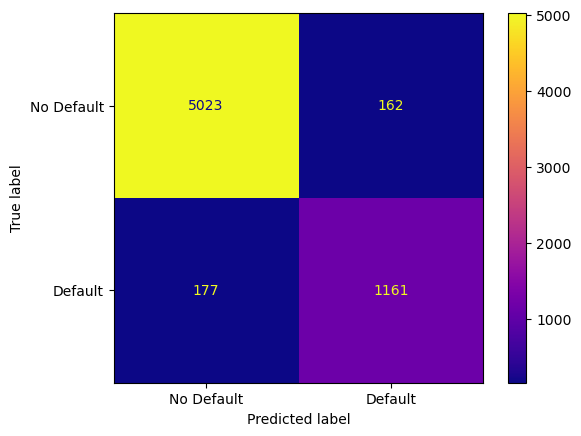

In [16]:
### Pretty confusion matrix
### Code for how to make confusion matrix pretty from 
### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator
log_predictions = log_model.predict(X_test)
cm = confusion_matrix(y_test, log_predictions, labels=[False, True])
#plt.figure(figsize=(1, 1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No Default', 'Default'])
disp.plot(cmap='plasma')
plt.show()

In [18]:
### Accuracy score
accuracy_score(y_test, log_predictions)

0.9480300475241453

In [19]:
### Classification Table
target_names = ["No Default", "Default"]
print(classification_report(y_test, log_predictions, target_names = target_names))

              precision    recall  f1-score   support

  No Default       0.97      0.97      0.97      5185
     Default       0.88      0.87      0.87      1338

    accuracy                           0.95      6523
   macro avg       0.92      0.92      0.92      6523
weighted avg       0.95      0.95      0.95      6523



# Tree

In [16]:
### Instantiate and fit a tree with max_depth=5
### Set a max depth because letting a tree be as deep as possible leads to overfitting and lack of probabilities of 
### each datapoint falling into one group (No Default) vs another (Default) according to 
### https://stats.stackexchange.com/questions/193424/is-decision-tree-output-a-prediction-or-class-probabilitie
tree_model = tree.DecisionTreeClassifier(random_state=1, max_depth=5)
tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [17]:
features = tree_model.tree_.feature
features[0]

53

In [18]:
threshold = tree_model.tree_.threshold

In [21]:
### Draw the tree (saved to a pdf because tree is too large to display clearly in Jupyter notebook)

### Convert tree into dot format
dot_data = tree.export_graphviz(tree_model, out_file=None, feature_names=X_train.columns, class_names=["No Default", "Default"], filled=True)

### Create graph from dot format
tree_graph = pydotplus.graph_from_dot_data(dot_data)

### Save the graph as a pdf
tree_graph.write_pdf("../Images/tree.pdf")

True

In [22]:
### Predictions from tree
tree_predictions = tree_model.predict(X_test_scaled)

In [23]:
### Create a dataframe consisting of 1) the predicted probabilities for each loan in the test dataset of not being defaulted/being defaulted, 
### 2) predictions for each loan in the test dataset of being defaulted/not defaulted, and 3) whether each loan in the test dataset was actually defaulted or not

### Get the probabilities associated with each datapoint in the testing set belonging to either No Default (left) or Default (right)
test_probs = tree_model.predict_proba(X_test_scaled)

### Dataframe
probs_and_actual_df = pd.DataFrame(test_probs, columns=['Predicted Probability No Default', 'Predicted Probability Default'])
     

### Make dataframe and column for whether the loan is predicted not defaulted/defaulted
predicted_default = []
for tree_prediction in tree_predictions:
    if tree_prediction == True:
        predicted_default.append("Default")
    else:
        predicted_default.append("No Default")
probs_and_actual_df["Predicted No Default/Default"] = predicted_default


### Make column for whether the loan is not defaulted/defaulted
actual = []
for y_t in y_test:
    if y_t == True:
        actual.append('Default')
    else:
        actual.append('No Default')
probs_and_actual_df["Actual No Default/Default"] = actual

In [24]:
### Look at created dataframe
probs_and_actual_df.head()

,Predicted Probability No Default,Predicted Probability Default,Predicted No Default/Default,Actual No Default/Default
0,0.004499,0.995501,Default,Default
1,0.784519,0.215481,No Default,Default
2,1.000000,0.000000,No Default,No Default
3,1.000000,0.000000,No Default,No Default
4,1.000000,0.000000,No Default,No Default


In [25]:
### Confusion matrix with only numbers
confusion_matrix(y_test, tree_predictions, labels=[False, True])

array([[5117,   68],
       [ 349,  989]], dtype=int64)

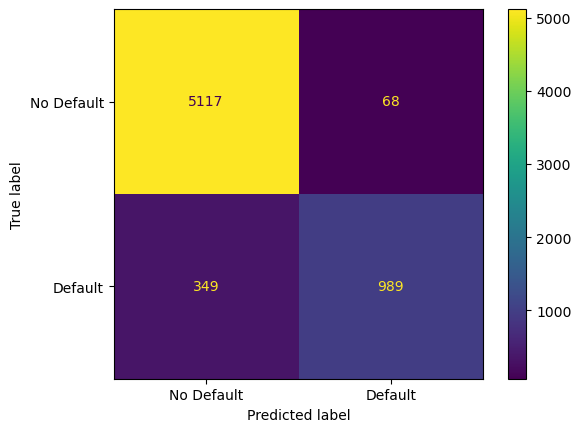

In [26]:
### Pretty confusion matrix
### Code for how to make confusion matrix pretty from 
### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator
cm = confusion_matrix(y_test, tree_predictions, labels=[False, True])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No Default', 'Default'])
disp.plot()
plt.show()

In [27]:
### Accuracy
accuracy_score(y_test, tree_predictions)

0.9360723593438602

In [28]:
### Classification Table
target_names = ["No Default", "Default"]
print(classification_report(y_test, tree_predictions, target_names = target_names))

              precision    recall  f1-score   support

  No Default       0.94      0.99      0.96      5185
     Default       0.94      0.74      0.83      1338

    accuracy                           0.94      6523
   macro avg       0.94      0.86      0.89      6523
weighted avg       0.94      0.94      0.93      6523



In [19]:
### Instantiate and fit a tree with max_depth=10
tree_model_2 = tree.DecisionTreeClassifier(random_state=1, max_depth=10)
tree_model_2.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1)

In [35]:
### Get the numerical importance of each feature
feature_importance = tree_model_2.feature_importances_
feature_importance

array([1.22290420e-02, 1.31968987e-02, 4.26312838e-03, 6.23680741e-04,
       5.53082405e-04, 8.71760077e-03, 1.35649874e-03, 1.75136923e-03,
       1.52955228e-03, 8.76685102e-03, 1.42887871e-03, 8.35358099e-04,
       0.00000000e+00, 1.91628100e-03, 5.24176499e-04, 0.00000000e+00,
       4.38321080e-04, 7.52871359e-02, 3.56815683e-02, 1.15933552e-02,
       3.94016710e-03, 3.79374304e-03, 0.00000000e+00, 4.75339094e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.33227416e-03, 1.36982712e-02, 8.55440325e-04,
       1.67750493e-03, 0.00000000e+00, 1.05042404e-03, 0.00000000e+00,
       4.71961580e-03, 2.17531151e-03, 2.92772003e-04, 2.92999678e-03,
       2.58491682e-02, 1.66822542e-02, 2.49281418e-03, 6.03473567e-03,
       1.46760033e-02, 1.66217382e-03, 1.96043497e-03, 3.00290834e-03,
       5.68043431e-04, 1.06217996e-02, 3.15940732e-02, 4.07015847e-03,
       1.16759951e-01, 5.38790265e-01, 0.00000000e+00, 7.60157783e-03])

In [40]:
### Make a series storing column number and its associated feature importance
feature_index = {}
for i in range(len(feature_importance)):
    feature_index[i] = feature_importance[i]
feature_importance_sr = pd.Series(feature_index)
top_5_features = feature_importance_sr.sort_values(ascending=False).head(5)

In [43]:
### Pair each column number from above with its column name and print out columns with 5 largest values to determine most important features
for top_5_feature in list(top_5_features.index):
    print(list(X_train.columns)[top_5_feature])

historical_default_NEW
historical_default_N
age_group_35 - 44
age_group_45 - 54
loan_grade_D


In [30]:
### Predictions from tree
tree_2_predictions = tree_model_2.predict(X_test_scaled)

In [31]:
### Draw the tree (saved to a pdf because tree is too large to display clearly in Jupyter notebook)
### Idea to make the image a pdf rather than an image file format (png, jpg) gotten from ChatGPT

### Convert tree into dot format
dot_data = tree.export_graphviz(tree_model_2, out_file=None, feature_names=X_train.columns, class_names=["No Default", "Default"], filled=True)

### Create graph from dot format
tree_graph_2 = pydotplus.graph_from_dot_data(dot_data)

### Save the graph as a pdf
tree_graph_2.write_pdf("../Images/tree2.pdf")

True

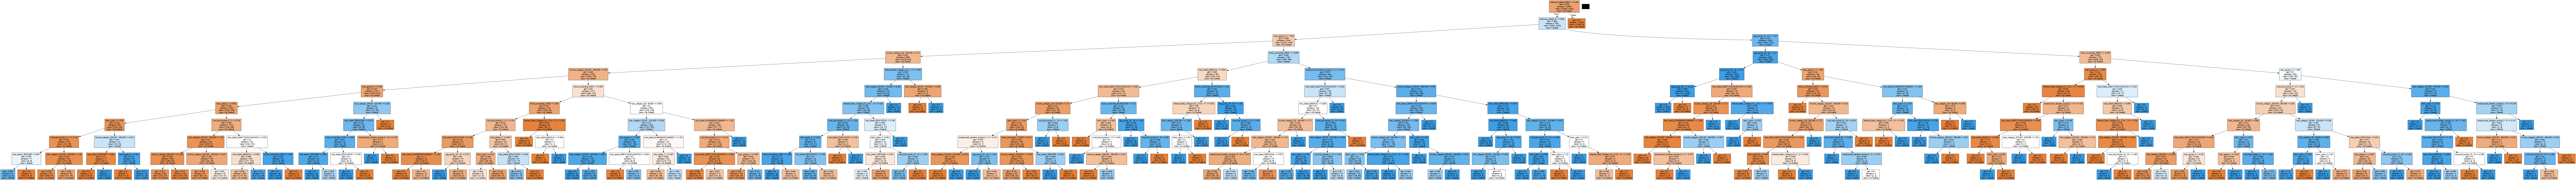

In [53]:
### Print an zoomed out version of the tree
### Attempts to zoom in by adjusting width and height using ChatGPT's suggestion
### Looks like changing width and height did not matter too much
Image(tree_graph_2.create_png())

In [33]:
### Create a dataframe consisting of the predicted probabilities of each loan from the test dataset of not being defaulted or being defaulted, 
### whether the logistic regression model predicts each loan as being defaulted or not defaulted, and whether the loan was actually defaulted or not

### Get the probabilities associated with each datapoint in the testing set belonging to either No Default (left) or Default (right)
test_probs_2 = tree_model_2.predict_proba(X_test_scaled)

### Dataframe
probs_and_actual_df = pd.DataFrame(test_probs_2, columns=['Predicted Probability No Default', 'Predicted Probability Default'])
     

### Make dataframe and column for whether the loan is predicted not defaulted/defaulted
predicted_default = []
for tree_2_prediction in tree_2_predictions:
    if tree_2_prediction == True:
        predicted_default.append("Default")
    else:
        predicted_default.append("No Default")
probs_and_actual_df["Predicted No Default/Default"] = predicted_default


### Make column for whether the loan is not defaulted/defaulted
actual = []
for y_t in y_test:
    if y_t == True:
        actual.append('Default')
    else:
        actual.append('No Default')
probs_and_actual_df["Actual No Default/Default"] = actual

In [34]:
### Look at created dataframe
probs_and_actual_df.head()

,Predicted Probability No Default,Predicted Probability Default,Predicted No Default/Default,Actual No Default/Default
0,0.000000,1.000000,Default,Default
1,0.912981,0.087019,No Default,Default
2,1.000000,0.000000,No Default,No Default
3,1.000000,0.000000,No Default,No Default
4,1.000000,0.000000,No Default,No Default


In [35]:
### Confusion matrix with only numbers
confusion_matrix(y_test, tree_2_predictions, labels=[False, True])

array([[5101,   84],
       [ 169, 1169]], dtype=int64)

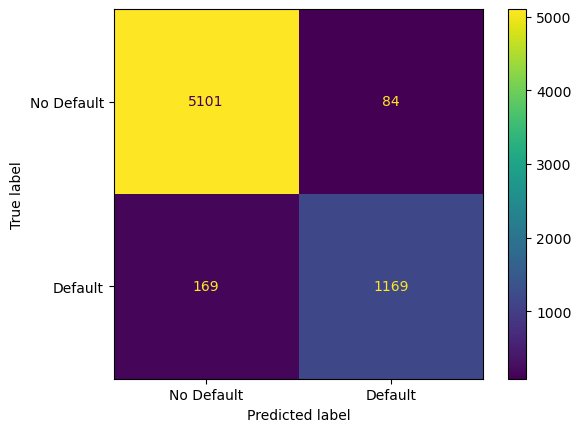

In [36]:
### Pretty confusion matrix
### Code for how to make confusion matrix pretty from 
### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator
cm = confusion_matrix(y_test, tree_2_predictions, labels=[False, True])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No Default', 'Default'])
disp.plot()
plt.show()

In [37]:
### Accuracy
accuracy_score(y_test, tree_2_predictions)

0.9612141652613828

In [38]:
### Classification Table
target_names = ["No Default", "Default"]
print(classification_report(y_test, tree_2_predictions, target_names = target_names))

              precision    recall  f1-score   support

  No Default       0.97      0.98      0.98      5185
     Default       0.93      0.87      0.90      1338

    accuracy                           0.96      6523
   macro avg       0.95      0.93      0.94      6523
weighted avg       0.96      0.96      0.96      6523



## Random Forest

In [39]:
### Instantiate and fit the random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model = rf_model.fit(X_train_scaled, y_train)

In [40]:
rf_predictions = rf_model.predict(X_test_scaled)

In [41]:
### Create a dataframe consisting of the predicted probabilities of each loan from the test dataset of not being defaulted or being defaulted, 
### whether the logistic regression model predicts each loan as being defaulted or not defaulted, and whether the loan was actually defaulted or not

### Get the probabilities associated with each datapoint in the testing set belonging to either No Default (left) or Default (right)
test_probs = rf_model.predict_proba(X_test_scaled)

## Create dataframe
probs_and_actual_df = pd.DataFrame(test_probs, columns=['Predicted Probability No Default', 'Predicted Probability Default'])

### Make column for whether the loan is predicted not defaulted/defaulted
predicted_default = []
for rf_prediction in rf_predictions:
    if rf_prediction == True:
        predicted_default.append("Default")
    else:
        predicted_default.append("No Default")
probs_and_actual_df["Predicted No Default/Default"] = predicted_default

### Make column for whether the loan is not defaulted/defaulted
actual = []
for y_t in y_test:
    if y_t == True:
        actual.append('Default')
    else:
        actual.append('No Default')
probs_and_actual_df["Actual No Default/Default"] = actual

In [42]:
### Look at created dataframe
probs_and_actual_df.head()

,Predicted Probability No Default,Predicted Probability Default,Predicted No Default/Default,Actual No Default/Default
0,0.06,0.94,Default,Default
1,0.81,0.19,No Default,Default
2,0.99,0.01,No Default,No Default
3,1.00,0.00,No Default,No Default
4,1.00,0.00,No Default,No Default


In [43]:
### Confusion matrix with only numbers
confusion_matrix(y_test, rf_predictions, labels=[False, True])

array([[5105,   80],
       [ 144, 1194]], dtype=int64)

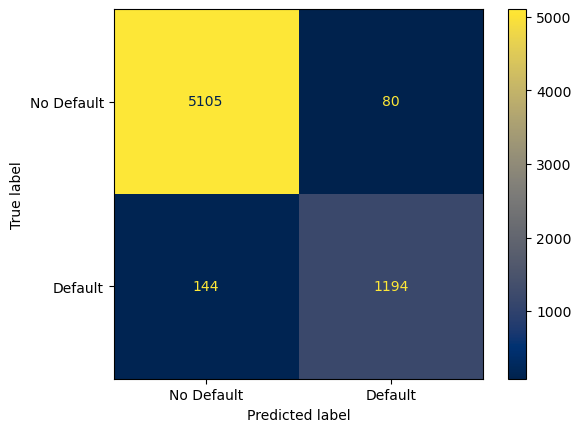

In [44]:
### Pretty confusion matrix
### Code for how to make confusion matrix pretty from 
### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator
cm = confusion_matrix(y_test, rf_predictions, labels=[False, True])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No Default', 'Default'])
disp.plot(cmap='cividis')
plt.show()

In [45]:
### Accuracy score
accuracy_score(y_test, rf_predictions)

0.965659972405335

In [46]:
### Classification Table
target_names = ["No Default", "Default"]
print(classification_report(y_test, rf_predictions, target_names = target_names))

              precision    recall  f1-score   support

  No Default       0.97      0.98      0.98      5185
     Default       0.94      0.89      0.91      1338

    accuracy                           0.97      6523
   macro avg       0.95      0.94      0.95      6523
weighted avg       0.97      0.97      0.97      6523

